In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
df = pd.DataFrame(
    [
        (1.0, 10),
        (1.3, 12),
        (1.5,  8),
        (1.8,  5),
        (2.1, 13)
    ],
    columns=['v','n']
)
df

,v,n
0,1.0,10
1,1.3,12
2,1.5,8
3,1.8,5
4,2.1,13


Der Median ist durch die Stelle von $(v,n)$ charakterisiert, wo `h_cum` erstmals größer als 0.5 ist.

In [3]:
df['h'] = df.n/df.n.sum()
df['h_cum'] = df.h.cumsum()
df

,v,n,h,h_cum
0,1.0,10,0.208333,0.208333
1,1.3,12,0.250000,0.458333
2,1.5,8,0.166667,0.625000
3,1.8,5,0.104167,0.729167
4,2.1,13,0.270833,1.000000


In [4]:
import matplotlib.pyplot as plt, matplotlib.ticker as tk
%matplotlib inline
%config InlineBackend.figure_format='retina' # nur MacBook Pro

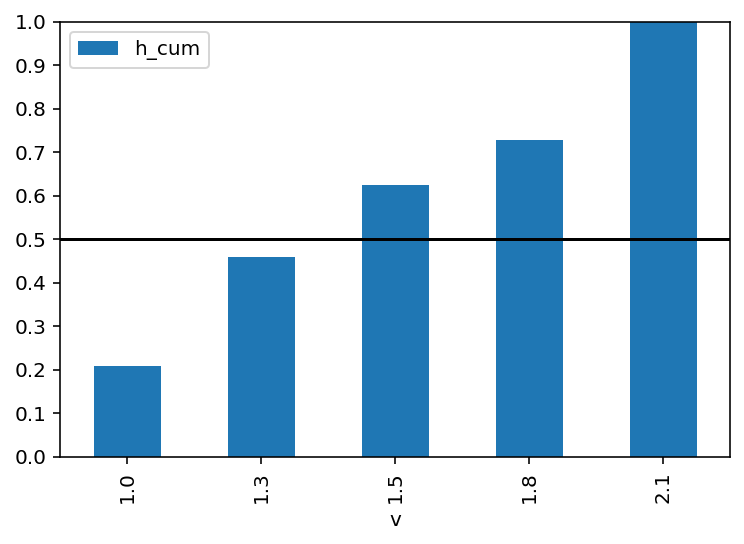

In [11]:
ax = df.plot(kind='bar',x='v',y='h_cum')
ax.axhline(0.5,c='k')
ax.set(ylim=(0,1))
ax.yaxis.set_major_locator(tk.MultipleLocator(0.1))

Die Bedeutung des Medians lässt sich durch folgende Überlegung erklären:

Wird die Größe `v` betrachtet und für die Werte, die von `v` repräsentiert werden, ein möglichst guter Schätzwert `x` gesucht, so wird dieser Schätzwert für in der Regel von einem `v_i` abweichen. Diese Abweichung

$$
  e_i = |x-v_i|
$$

kann durch den Betrag der Differenz zwischen `x` und `v_i` charakterisiert werden. Der Schätzwert `x_v` wird nun so festgelegt, dass die Summe der Fehlerbeträge 

$$
  e_\text{abs}(x) = \sum_i |x-v_i|
$$

minimal wird. Diese Summe der Fehlerbeträge wird im folgenden untersucht.

In [6]:
from sympy import *
init_printing()

from fun_expr import Function_from_Expression as FE

In [8]:
x = Symbol('x')

df['fn'] = np.abs(df.v - x)*df.n/S(df.n.sum())
df

,v,n,h,h_cum,fn
0,1.0,10,0.208333,0.208333,5*Abs(x - 1.0)/24
1,1.3,12,0.250000,0.458333,Abs(x - 1.3)/4
2,1.5,8,0.166667,0.625000,Abs(x - 1.5)/6
3,1.8,5,0.104167,0.729167,5*Abs(x - 1.8)/48
4,2.1,13,0.270833,1.000000,13*Abs(x - 2.1)/48


In [13]:
f = FE(x, df.fn.sum(),name=r'e_{\text{abs}}')
f.equation()

<IPython.core.display.Math object>

Der Graph dieser Funktion hat das folgende Aussehen:

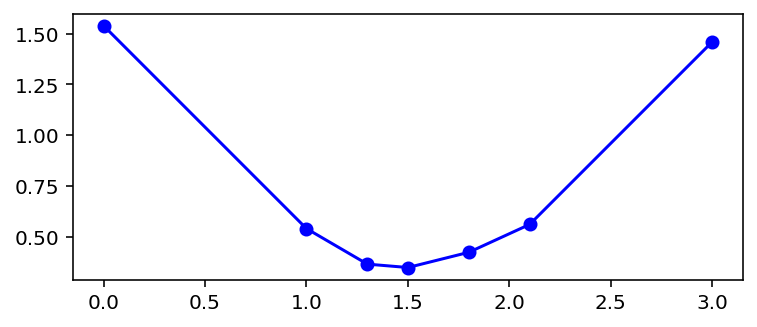

In [10]:
fig,ax  = plt.subplots()

lx = np.array([0] + list(df.v) + [3])

ax.plot(lx,f.lambdified(lx),'-bo')
ax.set_aspect(1.0)

Er hat folgende Eigenschaften:
- links vom kleinsten der Werte `v_i` besitzt er die Steigung -1
- rechts vom größten der Werte `v_i` besitzt er die Steigung +1
- die Steigung ist in jedem Intervall $(-\infty,v_0)$, $(v_0,v_1)$, $\ldots$, $(v_{n-2},v_{n-1})$, $(v_{n-1},\infty)$
  konstant und ändert sich in den Punkten $v_0, \ldots, v_{n-1}$ sprunghaft, und zwar um den Betrag
  $$
    2\cdot\dfrac{n_i}{n_\text{ges}}
  $$
- Das Minimum dieses Graphen liegt dort, wo die Steigung ihr Vorzeichen wechselt. Betrachtet man die Ungleichung
  $$
    2\cdot\dfrac{\sum_i n_i}{n_\text{ges}} -1 \ge 0
  $$
  so folgt:
  $$
    \sum_i n_i \ge \dfrac{1}{2}\,n_\text{ges}.
  $$
  Der Median von `v` ist deshalb durch das Minimum der Summe der Fehlerbeträge charakterisiert.